In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def activation_function(x):
  for i in range(len(x)):
    if x[i] < 0:
        x[i] = 0
    elif x[i] > 2:
        x[i] = 2
  return x

In [ ]:
class MexicanHat:
  def __init__(self, R1, R2, c1, c2, x, t_max, activation_function):
    self.R1 = R1
    self.R2 = R2
    self.c1 = c1
    self.c2 = c2
    self.t_max = t_max
    self.activation_function = activation_function
    self.x_old = [0 for i in range(len(x))]
    self.x = x
    self.counter = 0

  def identify_border(self, index, max_length):
    r1_left = index - self.R1
    r1_right = index + self.R1 + 1
    r2_left = index - self.R2
    r2_right = index + self.R2 + 1
    if r1_left < 0:
      r1_left = 0
    if r2_left < 0:
      r2_left = 0
    if r1_right > max_length:
      r1_right = max_length
    if r2_right > max_length:
      r2_right = max_length
    return r1_left, r1_right, r2_left, r2_right
  
  

  def update(self):

    for t in range(self.t_max):
        self.x_old = self.x.copy()
        if t > 0:
          plt.plot(self.x_old)
          # plt.show()
        for i in range(len(self.x)):
            a, b, c = 0, 0, 0
            for k in range(-1 * self.R1, self.R1 + 1):
                if i + k > 0 and i + k < len(self.x) - 1:
                    a += self.x_old[i + k]

            for k in range(-1 * self.R2, -1 * self.R1): 
                if i + k > 0 and i + k < len(self.x) - 1:
                    b += self.x_old[i + k]
            
            for k in range(self.R1 + 1, self.R2 + 1): 
                if i + k > 0 and i + k < len(self.x) - 1:
                    b += self.x_old[i + k]

            self.x[i] = self.c1 * a + self.c2 * (b + c)
        
        self.x = activation_function(self.x)

# **Part 1**

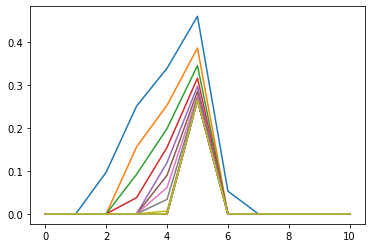

In [ ]:
x = [0.27, 0.35, 0.44, 0.58, 0.66, 0.77, 0.4, 0.32, 0.2, 0.15, 0.08]
Mh = MexicanHat(0, len(x), 1, -0.1 ,x, 20, activation_function)
Mh.update()

# **Part 2**

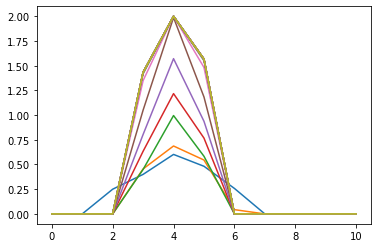

In [ ]:
x = [0.27, 0.35, 0.44, 0.58, 0.66, 0.77, 0.4, 0.32, 0.2, 0.15, 0.08]
Mh = MexicanHat(1, 3, 0.6, -0.4 ,x, 20, activation_function)
Mh.update()